# 3. Hallucinations of models

In [ ]:
from common import draw_bar_plot, load_predictions, load_trues

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict

def mean_year(preds:dict, year:int):    
    return np.mean([(len([v for v in vs if v])/len(vs) if len(vs) else 1) for k, vs in preds.items() if str(year) in k])

def mean_match_ids(keys:list, preds:dict, years:list=[2020, 2021, 2022, 2023, 2024]):
    scores = {str(k): {} for k in years}
    for year in years:
            for i, key in enumerate(keys):
                    scores[str(year)][key] = np.mean([mean_year(preds[i][f"A{annotator_i}"], year) for annotator_i in [1,2,3]])
    return scores

def format_to_df(mean_match:dict, keys:list, years:list=[2020, 2021, 2022, 2023, 2024]):
    data = defaultdict(list)
    data["year"] = years
    for method in keys:
        for year in years:
            data[method].append(mean_match[str(year)][method])
    return pd.DataFrame(data)

# Amount of undetermined ids per year

In [9]:
trues = load_trues("../reading_lists.csv", keys=["id_s2"])
preds = load_predictions([
    'current_methods/search_engines/preds/semantic_scholar', 
    'current_methods/search_engines/preds/google_scholar', 
    'current_methods/instructs_models/preds/gpt-4o-2024-08-06', 
    'current_methods/instructs_models/preds/gpt-4o-2024-08-06_json', 
    'current_methods/instructs_models/preds/gpt-4o-2024-08-06_structured_output', 
    'current_methods/instructs_models/preds/gemini-1.5-flash', 
    'current_methods/instructs_models/preds/gemini-1.5-flash_json', 
    'current_methods/instructs_models/preds/gemini-1.5-pro_json', 
    'current_methods/instructs_models/preds/OLMoE-1B-7B-0924-Instruct'
], keys=["id_s2"])

preds_names = [
    'Semantic Scholar', 
    'Google Scholar', 
    'GPT-4o-2024-08-06', 
    'GPT-4o-2024-08-06 (JM)', 
    'GPT-4o-2024-08-06 (SO)', 
    'Gemini 1.5 flash', 
    'Gemini 1.5 flash (JM)', 
    'Gemini 1.5 pro (JM)', 
    'OLMoE-1B-7B-0924-Instruct'
]

mean_match = mean_match_ids(preds_names, preds); mean_match

{'2020': {'Semantic Scholar': 1.0,
  'Google Scholar': 0.9380174291938997,
  'GPT-4o-2024-08-06': 0.588235968622055,
  'GPT-4o-2024-08-06 (JM)': 0.35763673890608877,
  'GPT-4o-2024-08-06 (SO)': 0.31764705882352945,
  'Gemini 1.5 flash': 0.27856223583777767,
  'Gemini 1.5 flash (JM)': 0.628024790927723,
  'Gemini 1.5 pro (JM)': 0.5556412949795303,
  'OLMoE-1B-7B-0924-Instruct': 0.15459951782570613},
 '2021': {'Semantic Scholar': 1.0,
  'Google Scholar': 0.975438596491228,
  'GPT-4o-2024-08-06': 0.5977500461083646,
  'GPT-4o-2024-08-06 (JM)': 0.37543859649122807,
  'GPT-4o-2024-08-06 (SO)': 0.3315789473684211,
  'Gemini 1.5 flash': 0.31591905460245046,
  'Gemini 1.5 flash (JM)': 0.6648517931473772,
  'Gemini 1.5 pro (JM)': 0.5884286740242418,
  'OLMoE-1B-7B-0924-Instruct': 0.19711836151464635},
 '2022': {'Semantic Scholar': 1.0,
  'Google Scholar': 0.9561403508771931,
  'GPT-4o-2024-08-06': 0.6134997042830675,
  'GPT-4o-2024-08-06 (JM)': 0.4368421052631579,
  'GPT-4o-2024-08-06 (SO)': 0.

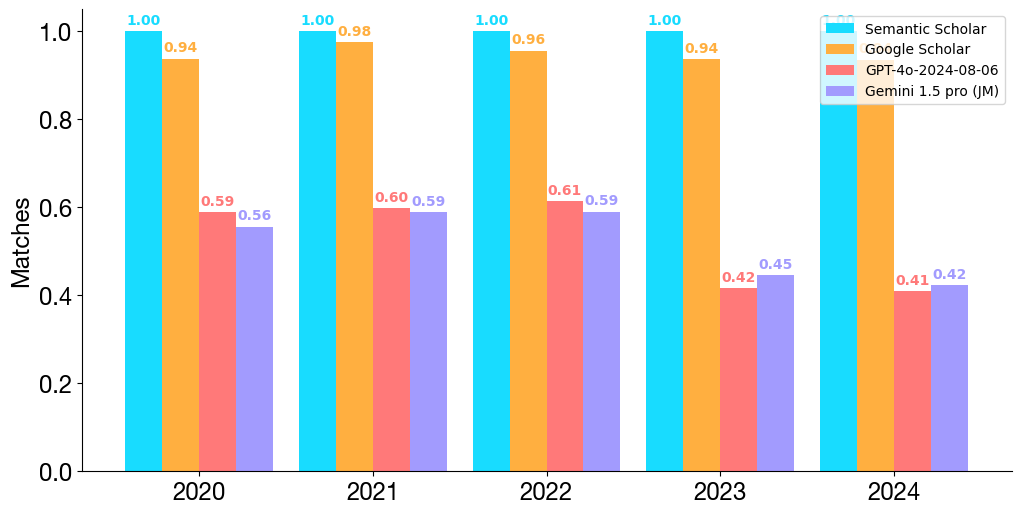

In [5]:
df = format_to_df(mean_match, ["Semantic Scholar", "Google Scholar", "GPT-4o-2024-08-06", "Gemini 1.5 pro (JM)"])
draw_bar_plot(df, ylabel="Matches")

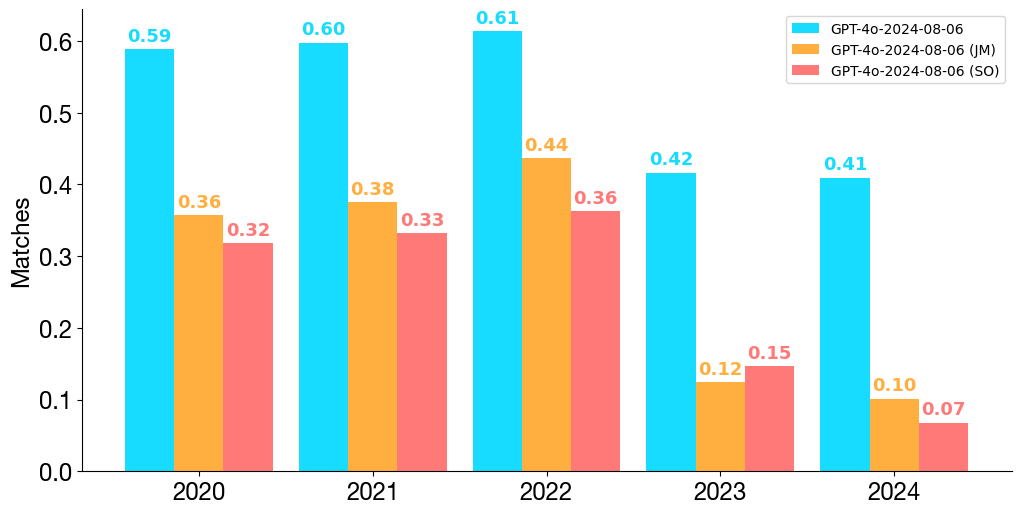

In [6]:
df = format_to_df(mean_match, ["GPT-4o-2024-08-06", "GPT-4o-2024-08-06 (JM)", "GPT-4o-2024-08-06 (SO)"])
draw_bar_plot(df, ylabel="Matches")

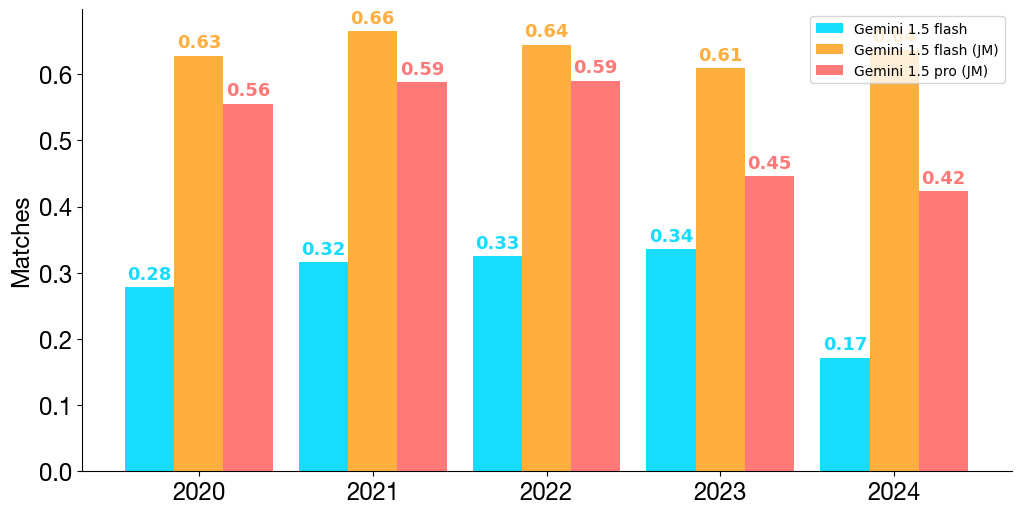

In [7]:
df = format_to_df(mean_match, ["Gemini 1.5 flash", "Gemini 1.5 flash (JM)", "Gemini 1.5 pro (JM)"])
draw_bar_plot(df, ylabel="Matches")

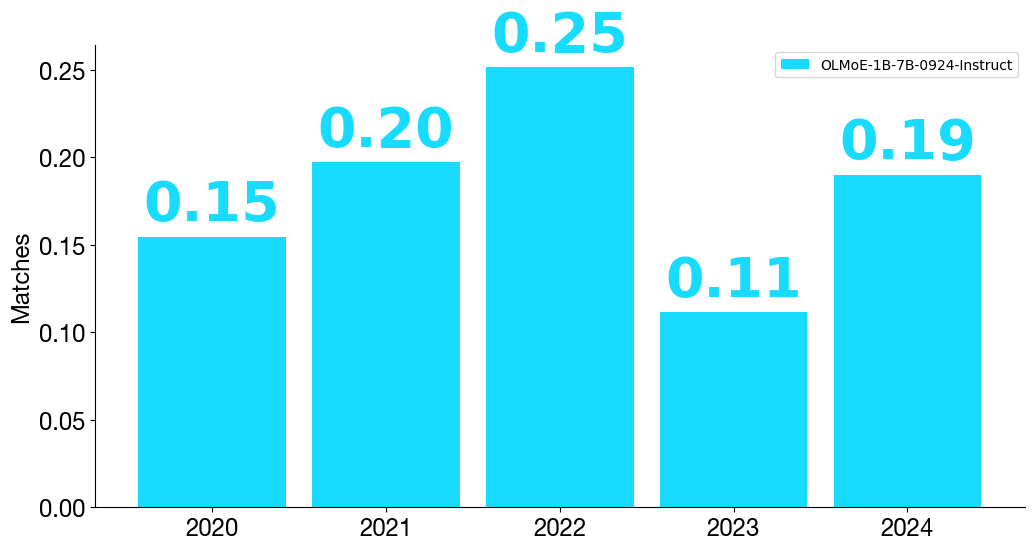

In [8]:
df = format_to_df(mean_match, ["OLMoE-1B-7B-0924-Instruct"])
draw_bar_plot(df, ylabel="Matches")